MODELLING  
その前にTuple，Named Tuple, Dictionaries

In [1]:
# リストの反転
a = range(10)
# from, until, step
list(a[::-1])

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [2]:
l1 = ["lists", "I", "am"]
l2 = ["a", "leed", "I"]

def listShareString(l1, l2):
    return len(set(l1) & set(l2)) > 0

print("First List:", l1)
print("Second List:", l2)

print("OUTPUT:", listShareString(l1, l2))

First List: ['lists', 'I', 'am']
Second List: ['a', 'leed', 'I']
OUTPUT: True


In [3]:
def factorial(n):
    if n < 0: raise ValueError("input 0 or positive number")
    return 1 if n <= 1 else n * factorial(n-1)

# print([factorial(i) for i in range(3,1000)])
# factorial(2959) # recursive limit

def _factorial_for_memory(f, t):
    print(f, t)
    dist = t - f
    if dist == 1: return f * t
    return _factorial_for_memory(f, t - (dist - 1)) * _factorial_for_memory(f + (dist - 1), t)

def factorial_for_memory(n): 
    return _factorial_for_memory(1, n)

factorial_for_memory(3)

1 3
1 2
2 3


12

1 5
1 2, 3 5
2, 

In [4]:
# 全ての組み合わせを生成
import itertools
list(itertools.permutations(range(3)))

[(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)]

ソート
- selection sort: 最大値を後ろに追いやっていく O(n^2)
- bubble sort: バブルソート O(n^2)
- merge sort: 2つに分けて要素が1つになったら隣のブロックとマージしていく O(n logn)
- timsort: python のソート， O(n logn)

時間計って，データ数と時間の関係を図で表して，一番速い奴がどれかを決めて，なぜそれが速いのか考察して，提出：yagodiezdoncso@gmail.com  
コードはファイルをそれぞれ分けて提出
レポートはPDFかなんかで提出

In [70]:
import time
import random

def measure_sort(lengths_of_lists, algorithm, max_int=10000):
    elapsed_times = []
    for length in lengths_of_lists:
        alist = [random.randint(0, max_int) for i in range(length)]
        start = time.time()
        algorithm(alist)
        end = time.time()
        elapsed_times.append(end - start)
    
    return [lengths_of_lists, elapsed_times]

lengths = [10, 20, 30, 50, 100, 200, 500, 800, 1500, 2500]

In [71]:
# copied from
# http://interactivepython.org/runestone/static/pythonds/SortSearch/TheSelectionSort.html
def selectionSort(alist):
    for fillslot in range(len(alist)-1,0,-1):
        positionOfMax=0
        for location in range(1,fillslot+1):
            if alist[location]>alist[positionOfMax]:
                positionOfMax = location

        temp = alist[fillslot]
        alist[fillslot] = alist[positionOfMax]
        alist[positionOfMax] = temp

In [72]:
# copied from
# http://interactivepython.org/runestone/static/pythonds/SortSearch/TheBubbleSort.html
def bubbleSort(alist):
    for passnum in range(len(alist)-1,0,-1):
        for i in range(passnum):
            if alist[i]>alist[i+1]:
                temp = alist[i]
                alist[i] = alist[i+1]
                alist[i+1] = temp

In [73]:
# copied from
# https://www.pythoncentral.io/merge-sort-implementation-guide/
def mergeSort(alist):
    if len(alist)>1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]

        mergeSort(lefthalf)
        mergeSort(righthalf)

        i=0
        j=0
        k=0

        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1
            else:
                alist[k]=righthalf[j]
                j=j+1
                k=k+1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1

In [74]:
def timSort(alist):
    alist.sort()
    return alist

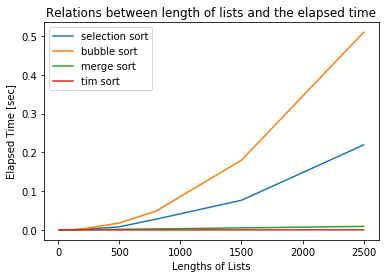

In [86]:
import matplotlib.pyplot as plt

selection_sort_times = measure_sort(lengths, selectionSort)
bubble_sort_times = measure_sort(lengths, bubbleSort)
merge_sort_times = measure_sort(lengths, mergeSort)
tim_sort_times = measure_sort(lengths, timSort)

plt.plot(*selection_sort_times)
plt.plot(*bubble_sort_times)
plt.plot(*merge_sort_times)
plt.plot(*tim_sort_times)
plt.title("Relations between length of lists and the elapsed time")
plt.xlabel("Lengths of Lists")
plt.ylabel("Elapsed Time [sec]")
plt.legend(["selection sort", "bubble sort", "merge sort", "tim sort"])
plt.show()

merge sort and tim sort are $O(n logn)$.  
So they are considerably faster than bubble sort and selection sort whose orders are $O(n^2)$

# Tuple

In [42]:
myTuple = ("Winston", 25, 15.23, True, ["reading", "cricket"]) # Immutable

In [63]:
from collections import namedtuple as nt

playerQualiteies = nt('playerQualities', 'power spling stamina')

Create a list of 3d points (random [-1, 1]^3)  
Change negatives to zero

In [79]:
import numpy as np
unif = np.random.uniform
num_points = 10

points = [(unif(-1, 1), unif(-1, 1), unif(-1, 1)) for i in range(num_points)]
print(points, '\n')

positive_points = [(max(0, x), max(0, y), max(0, z)) for x, y, z in points]
print(positive_points)

[(0.1400892581959572, 0.7860663311634741, 0.9359282324496989), (-0.6520962606764493, 0.8342084234679001, 0.6723917768666858), (-0.38795935302826967, -0.45356666158053227, -0.4525720529687902), (-0.3107525695267572, 0.4469061642016747, -0.7191158071239949), (-0.10878543000013807, -0.6898060088202094, 0.362713708612425), (0.6527560240652013, 0.6396682080151708, 0.08611804614015472), (-0.39679327250727225, -0.8668864541233277, -0.580640501243703), (0.3774382943658754, -0.2955309692750838, -0.547076482222129), (-0.21196228715756793, -0.6911585854808797, 0.7992688843060953), (-0.7044128976464283, -0.020586402776478607, 0.7088869829524598)] 

[(0.1400892581959572, 0.7860663311634741, 0.9359282324496989), (0, 0.8342084234679001, 0.6723917768666858), (0, 0, 0), (0, 0.4469061642016747, 0), (0, 0, 0.362713708612425), (0.6527560240652013, 0.6396682080151708, 0.08611804614015472), (0, 0, 0), (0.3774382943658754, 0, 0), (0, 0, 0.7992688843060953), (0, 0, 0.7088869829524598)]


# Dictionary(Map)
定数オーダで欲しいデータが手に入るよ  
.items()でイテレートできるよ

In [91]:
d = {}
for i in range(10):
    d[i] = np.random.randint(0, 10)

for n, i in d.items():
    print(n, "->", i)

0 -> 7
1 -> 7
2 -> 7
3 -> 8
4 -> 5
5 -> 6
6 -> 3
7 -> 3
8 -> 2
9 -> 3
